#**MACHINE LEARNING - FINAL PROJECT**

#**HEART DISEASE PREDICTION MODEL**

###TEAM 6
GROUP MEMBERS:

1. RIDA FATHIMA
2. HARI PRIYA AVARAMPALAYAM MANOHARAN
3. AGASH SEKAR





Dataset = 
https://www.kaggle.com/datasets/themrityunjaypathak/heart-disease-and-stroke-*prevention*

In [ ]:
#Installing "us" for Choropleth Map (EDA)
!pip install us

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 132.6/132.6 kB 3.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for us: filename=us-2.0.2-py3-none-any.whl size=11941 sha256=cee443021c3ff7d4ae7baabc8f75557a1a0b5d695da91fc41f94dc57dd1e1fef
  Stored in directory: /root/.cache/pip/wheels/1a/93/5b/98d3861ec2c4a9d90b16324c6f8d7e4db03e6a830bc993adbb
  Created wheel for jellyfish: filename=jellyfish-0.6.1-cp39-cp39-linux_x86_64.whl size=82478 sha256=5666a7b5515ce325feb7212fe93c3220977fab333eb332fb64e557d9220e9e1a
  Stored in directory: /root/.cache/pip/wheels/e6/7d/be/a937dbd1f988778a15011a563ac3a12917103bfc25ff6cb473
Successfully built us jellyfish


In [1]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
import plotly.express as px
import pandas as pd
import us
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, recall_score
from sklearn.metrics import confusion_matrix
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV


C:\Users\washi\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\washi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\washi\anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\washi\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Loading the Data

In [2]:
# reading data
df = pd.read_csv(r"C:\Users\washi\Downloads\heart_disease_data.csv")
df.shape

(42640, 29)

# Data Cleaning and Preprocessing

**Checking for Null Values in the columns**

In [3]:
df.isnull().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                     0
PriorityArea2                     0
PriorityArea3                     0
PriorityArea4                     0
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                      529
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42111
Data_Value_Footnote           42111
LowConfidenceLimit              529
HighConfidenceLimit             529
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

**Dropping the columns which have more than 50% of the data as Null Values**

In [4]:
df.drop(["Data_Value_Footnote_Symbol","Data_Value_Footnote","GeoLocation"],axis=1,inplace=True)

**Checking for Null Values Again**

In [5]:
df.isnull().sum()

Year                     0
LocationAbbr             0
LocationDesc             0
DataSource               0
PriorityArea1            0
PriorityArea2            0
PriorityArea3            0
PriorityArea4            0
Category                 0
Topic                    0
Indicator                0
Data_Value_Type          0
Data_Value_Unit          0
Data_Value             529
Data_Value_Alt           0
LowConfidenceLimit     529
HighConfidenceLimit    529
Break_Out_Category       0
Break_Out                0
CategoryId               0
TopicId                  0
IndicatorID              0
Data_Value_TypeID        0
BreakOutCategoryId       0
BreakOutId               0
LocationID               0
dtype: int64

**"Data_Value", "LowConfidenceLimit", "HighConfidenceLimit","GeoLocation" have Null Values in them**

In [6]:
df1 = df.copy()

**Applied Square Root Transformation on the "Data_Value", "LowCOnfidenceLimit", "HighConfidenceLimit" Columns to convert them into Normal Distribution**

In [7]:
df1[["Data_Value"]] = np.sqrt(df1[["Data_Value"]])
df1[["LowConfidenceLimit"]] = np.sqrt(df1[["LowConfidenceLimit"]] )
df1[["HighConfidenceLimit"]] = np.sqrt(df1[["LowConfidenceLimit"]])


**The mean and Median of "Data_Value", "LowCOnfidenceLimit", "HighConfidenceLimit" Columns are almost equal. Which means they are normally distributed.**\
**Hence we can impute the Null Values with their means**

In [8]:
df1[["Data_Value"]].describe()

,Data_Value
count,42111.000000
mean,3.512488
std,1.563133
min,0.632456
25%,2.121320
50%,3.271085
75%,4.647580
max,18.256506


In [9]:
df1[["HighConfidenceLimit"]].describe()

,HighConfidenceLimit
count,42111.000000
mean,1.717526
std,0.495398
min,0.000000
25%,1.396194
50%,1.692207
75%,2.104089
max,3.115392


In [10]:
df1[["LowConfidenceLimit"]].describe()

,LowConfidenceLimit
count,42111.000000
mean,3.195310
std,1.565745
min,0.000000
25%,1.949359
50%,2.863564
75%,4.427189
max,9.705668


**Imputing the Null Values with the means**

In [11]:
df1['Data_Value'].fillna(df1['Data_Value'].mean(), inplace = True)
df1['LowConfidenceLimit'].fillna(df1['LowConfidenceLimit'].mean(), inplace = True)
df1['HighConfidenceLimit'].fillna(df1['HighConfidenceLimit'].mean(), inplace = True)

### Finding the Outlier

<AxesSubplot:xlabel='Data_Value'>

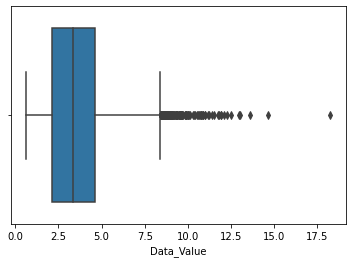

In [12]:
sns.boxplot(data=df1, x="Data_Value") 

<AxesSubplot:xlabel='HighConfidenceLimit'>

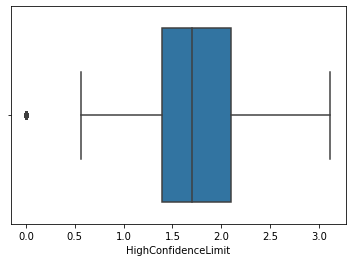

In [13]:
sns.boxplot(data=df1, x="HighConfidenceLimit")

<AxesSubplot:xlabel='LowConfidenceLimit'>

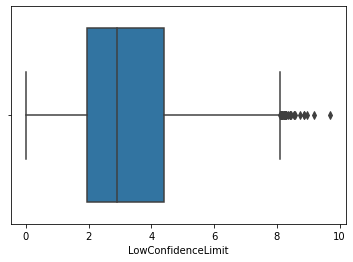

In [14]:
sns.boxplot(data=df1, x="LowConfidenceLimit")

**The Outliers from "Data_Value", "LowCOnfidenceLimit", "HighConfidenceLimit" are dropped**

In [15]:
num=df.select_dtypes(include='number')

q1=df['Data_Value'].quantile(0.25)
q3=df['Data_Value'].quantile(0.75)
iqr=q3-q1
u=q3+1*iqr
l=q1-1*iqr
df1=df[(df['Data_Value']<u)&(df['Data_Value']>l)]


quan1=df1['LowConfidenceLimit'].quantile(0.25)
quan3=df1['LowConfidenceLimit'].quantile(0.75)
Iqr=quan3-quan1
uppe=quan3+1.5*Iqr
lowe=quan1-1.5*Iqr
df1=df1[(df1['LowConfidenceLimit']<uppe)&(df1['LowConfidenceLimit']>lowe)]

quant1=df1['HighConfidenceLimit'].quantile(0.25)
quant3=df1['HighConfidenceLimit'].quantile(0.75)
I_qr=quant3-quant1
upper=quant3+1*I_qr
lower=quant1-1*I_qr
df1=df1[(df1['HighConfidenceLimit']<upper)&(df1['HighConfidenceLimit']>lower)]
print(df1.shape)
print(df.shape)


(38692, 26)
(42640, 26)


**The Boxplots after Dropping the oUtliers**

<AxesSubplot:xlabel='Data_Value'>

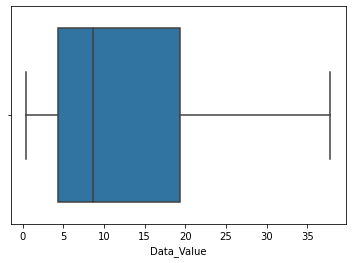

In [16]:
sns.boxplot(data=df1, x="Data_Value") 

<AxesSubplot:xlabel='LowConfidenceLimit'>

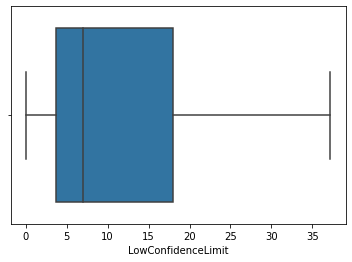

In [17]:
sns.boxplot(data=df1, x="LowConfidenceLimit") 

<AxesSubplot:xlabel='HighConfidenceLimit'>

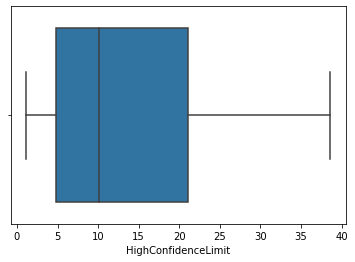

In [18]:
sns.boxplot(data=df1, x="HighConfidenceLimit") 

**Label Encoding the Categorical Features**

In [19]:
df2 = df1.copy()

In [20]:
lab=LabelEncoder()


df1['Topic']=lab.fit_transform(df1['Topic'])
df1['Break_Out_Category']=lab.fit_transform(df1['Break_Out_Category'])
df1['BreakOutId']=lab.fit_transform(df1['BreakOutId'])
df1['Data_Value_Unit']=lab.fit_transform(df1['Data_Value_Unit'])
df1['PriorityArea1']=lab.fit_transform(df1['PriorityArea1'])
df1['PriorityArea3']=lab.fit_transform(df1['PriorityArea3'])








In [21]:
print("Target Unique Values before Label Encoding:", df.Topic.unique())

Target Unique Values before Label Encoding: ['Heart Failure' 'Coronary Heart Disease' 'Stroke'
 'Major Cardiovascular Disease' 'Diseases of the Heart (Heart Disease)'
 'Acute Myocardial Infarction (Heart Attack)']


In [22]:
print("Target Unique Values after Label Encoding:", df1.Topic.unique())

Target Unique Values after Label Encoding: [3 1 5 4 2 0]


**Checking for Collinearity between the features**

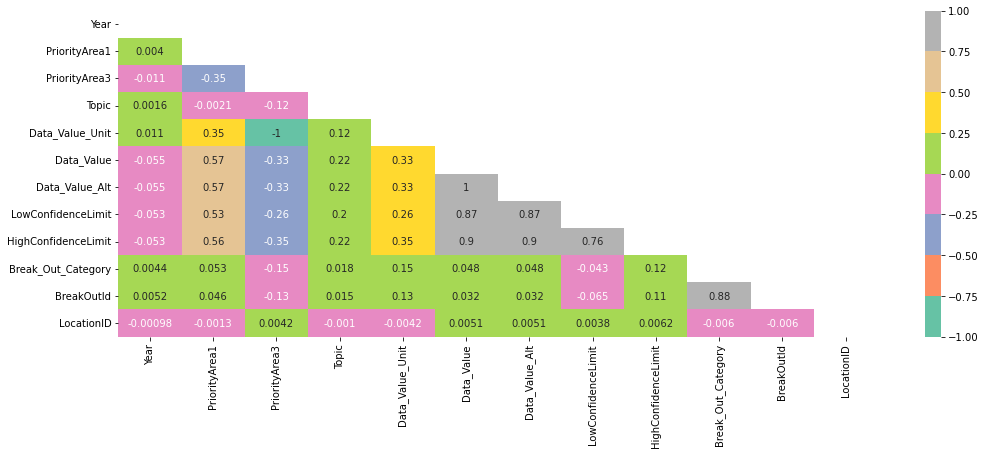

In [23]:
plt.figure(figsize=(17,6))
corr = df1.corr(method='kendall')
my_m=np.triu(corr)
sns.heatmap(corr,mask=my_m, annot=True, cmap="Set2")
plt.show()

# Trend Analysis

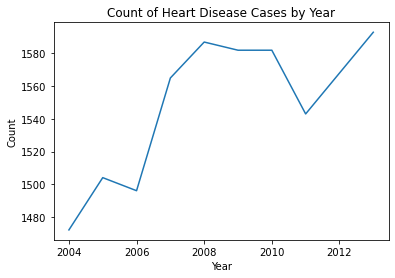

In [24]:
import matplotlib.pyplot as plt
heart_disease_df = df1[df1['Topic'] == 0]
heart_disease_df['Year'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases by Year')
plt.show()


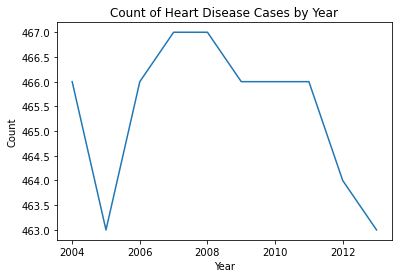

In [25]:
import matplotlib.pyplot as plt
heart_disease_df = df1[df1['Topic'] == 1]
heart_disease_df['Year'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases by Year')
plt.show()


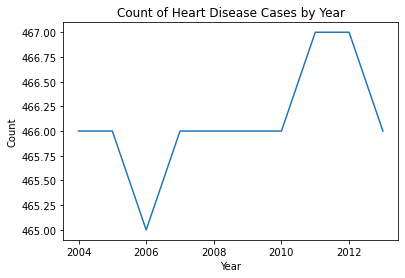

In [26]:
import matplotlib.pyplot as plt
heart_disease_df = df1[df1['Topic'] == 2]
heart_disease_df['Year'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases by Year')
plt.show()


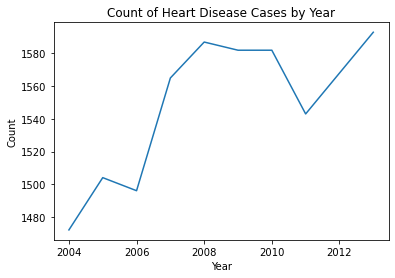

In [27]:
import matplotlib.pyplot as plt
heart_disease_df = df1[df1['Topic'] == 3]
heart_disease_df['Year'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases by Year')
plt.show()


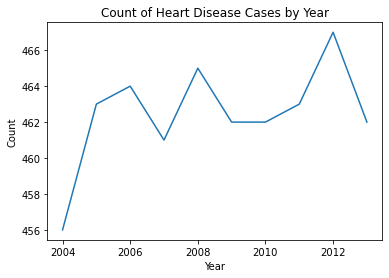

In [28]:
import matplotlib.pyplot as plt
heart_disease_df = df1[df1['Topic'] == 4]
heart_disease_df['Year'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases by Year')
plt.show()


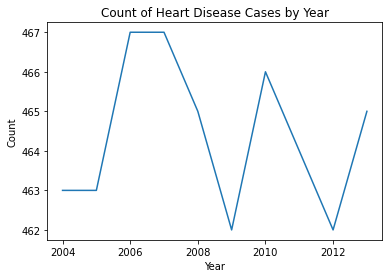

In [29]:
import matplotlib.pyplot as plt
heart_disease_df = df1[df1['Topic'] == 5]
heart_disease_df['Year'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases by Year')
plt.show()


## Feature Selection 
The Top features are selected for better Analysis and Modelling

**Chi-Square Algorithm**

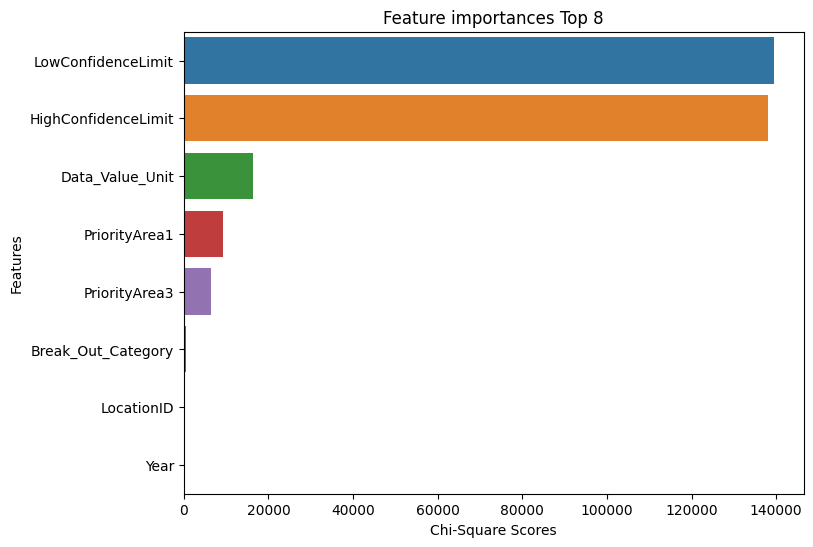

In [ ]:
# assuming X and y are the feature matrix and target vector respectively
selector = SelectKBest(score_func=chi2, k=8) # choose top 10 features
x_new = selector.fit_transform(x, y)

# get the chi-square scores for each feature
chi_scores = selector.scores_

# create a pandas dataframe to store the chi-square scores and feature names
features_df = pd.DataFrame({'Features': x.columns, 'Chi-Square Scores': chi_scores})

# sort the features based on their chi-square scores in descending order
features_df = features_df.sort_values('Chi-Square Scores', ascending=False)

# select the top 10 features based on their chi-square scores
top10_features = features_df['Features'].head(10)

# plot the top 10 features based on their chi-square scores
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 8')
sns.barplot(x='Chi-Square Scores', y='Features', data=features_df.head(10))
plt.show()

**XGB Classification for Feature Selection**

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

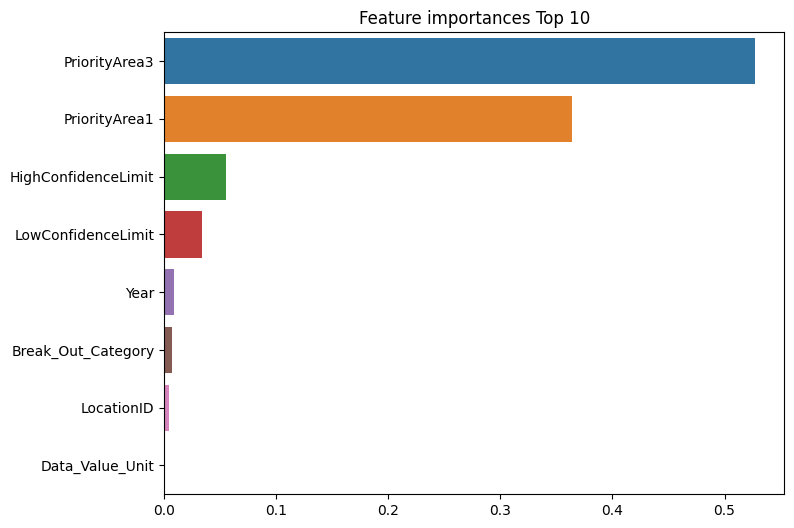

In [ ]:
model = XGBClassifier(n_estimators=40, random_state=2304, eval_metric='mlogloss')
model.fit(x_train, y_train)
XGBClassifier_importances_values = model.feature_importances_

XGBClassifier_importances = pd.Series(XGBClassifier_importances_values, index=x_train.columns)

XGBClassifier_top10 = XGBClassifier_importances.sort_values(ascending=False)[:8]
plt.figure(figsize=(8,6))
plt.title('Feature importances Top 10')
sns.barplot(x=XGBClassifier_top10 , y = XGBClassifier_top10.index)
plt.show()

The Top features after Chi-Square and XGB Classification are - **'Year', 'LowConfidenceLimit', 'HighConfidenceLimit', 'Break_Out_Category', 'PriorityArea1', 'PriorityArea3', 'Data_Value_Unit', 'LocationID'**


The Features are divided into 'x' and 'y' for analysis purpose

In [24]:
x=df1[['Year','LowConfidenceLimit','HighConfidenceLimit',
  'Break_Out_Category','PriorityArea1','PriorityArea3','Data_Value_Unit','LocationID']]
y=df1['Topic']

In [25]:
df_new = pd.DataFrame(data=x,columns = x.columns)

HeatMap after Feature Selection

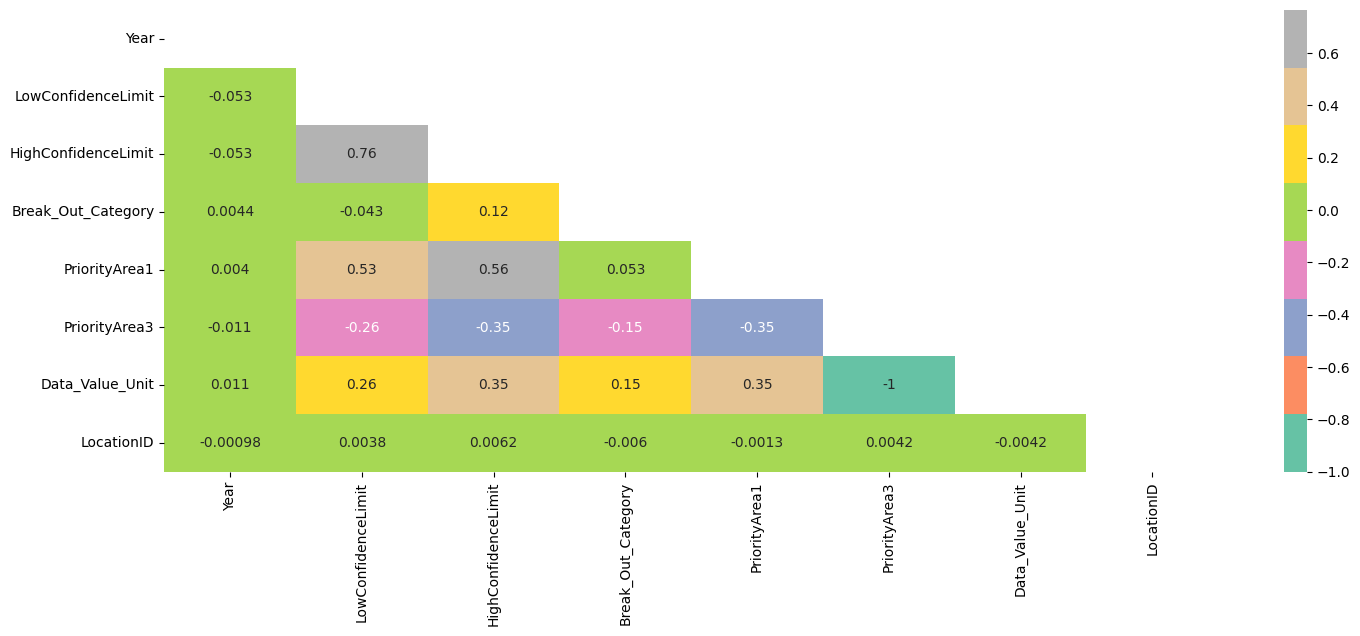

In [26]:
plt.figure(figsize=(17,6))
corr = df_new.corr(method='kendall')
my_m=np.triu(corr)
sns.heatmap(corr,mask=my_m, annot=True, cmap="Set2")
plt.show()

We see that None of the features are Highly Correlated with each other. hence, suitable for Analysis

## Exploratory Data Analysis

**Horizontal Bar Graph - to explain the distribution of Target Feature**

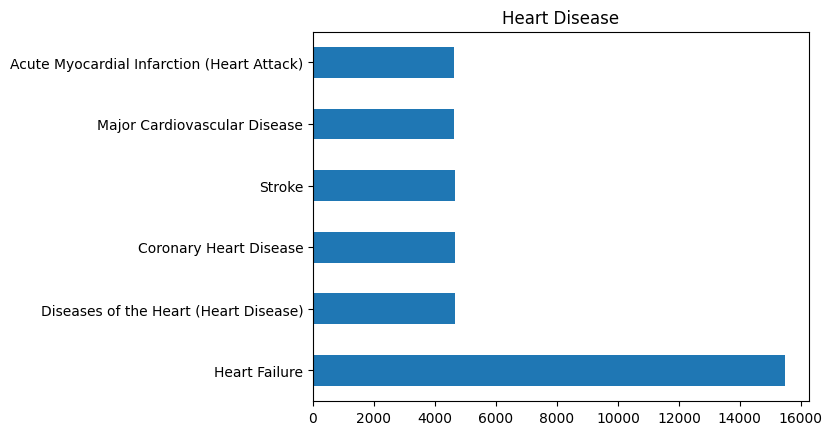

In [27]:
df2["Topic"].value_counts().plot(kind='barh')
plt.title('Heart Disease')
plt.show()

**Line Plots to show the Year-wise count of Target Feature**

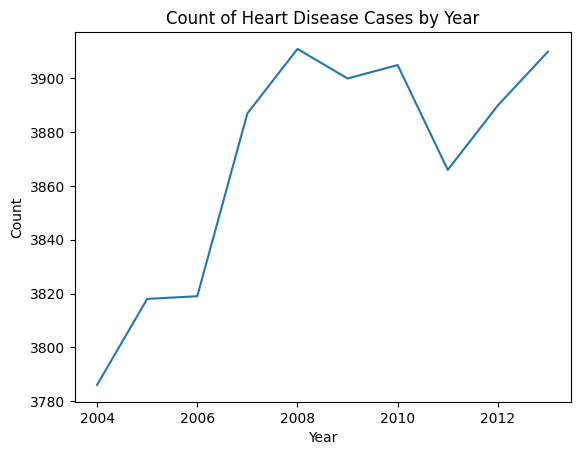

In [39]:
df2['Year'].value_counts().sort_index().plot(kind='line')
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Count of Heart Disease Cases by Year')
plt.show()


**Choropleth Map to show the State - Wise Count of Heart Disease cases**

In [ ]:
# filter out UNITED STATES from dataframe as it is a not a state name.
df_filtered = df1[df1['LocationDesc'] != 'United States']

# filtered out 'Washington, DC' from DataFrame as it was repeated twice.
df_filtered = df1[df1['LocationDesc'] != 'Washington, DC']


# create a new dataframe without 0 frequencies in the topic column
df_filtered = df_filtered[df_filtered['Topic'] != 0]

# group by LocationDesc and topic, count the frequencies, and reset the index
state_freq = df_filtered.groupby(['LocationDesc', 'Topic']).size().reset_index(name='freq')

# group by LocationDesc and sum the frequencies by state, then reset the index
state_freq = state_freq.groupby(['LocationDesc'])['freq'].sum().reset_index()

# rename LocationDesc to state to match the expected column name in plotly
state_freq = state_freq.rename(columns={'LocationDesc': 'state'})




In [ ]:
#Cheking the state_freq dataframe
state_freq.head(5)

,state,freq
0,Alabama,635
1,Alaska,665
2,Arizona,695
3,Arkansas,650
4,California,684


In [ ]:
# Add state codes to the data frame
state_codes = []
for state_name in state_freq['state']:
    state = us.states.lookup(state_name)
    if state is not None:
        state_codes.append(state.abbr)
    else:
        
        state_codes.append(None)
state_freq['state_code'] = state_codes

# Remove entries with missing state codes
#state_freq = state_freq.dropna()

# Plot the data on a map
fig = px.choropleth(locations=state_freq['state_code'], locationmode='USA-states',
                    color=state_freq['freq'], scope='usa',
                    color_continuous_scale='Blues', hover_name=state_freq['state'])

fig.show()


# Modelling

##1. Without Sampling

**Performing the train-test split**

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y)

**Logistic Regression**

In [51]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)
print(classification_report(y_pred, y_test))
print("Recall Score is: ",recall_score(y_pred, y_test,average="micro"))



              precision    recall  f1-score   support

           0       0.84      0.75      0.79      1320
           1       0.20      0.33      0.25       722
           2       0.08      0.16      0.11       601
           3       0.73      0.58      0.65      4851
           4       0.45      0.56      0.50       939
           5       0.67      0.64      0.66      1240

    accuracy                           0.56      9673
   macro avg       0.50      0.50      0.49      9673
weighted avg       0.63      0.56      0.59      9673

Recall Score is:  0.563010441434922


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix')

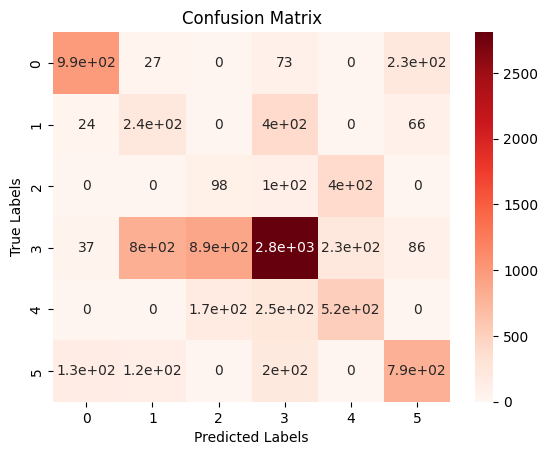

In [53]:
# Compute confusion matrix
cm = confusion_matrix(y_pred, y_test)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**Decision Tress Classification**

In [54]:
tre=DecisionTreeClassifier()
tre.fit(x_train,y_train)
y_pred = tre.predict(x_test)
print(classification_report(y_pred, y_test))
print("Recall Score is: ",recall_score(y_pred, y_test,average="micro"))

              precision    recall  f1-score   support

           0       0.82      0.81      0.82      1199
           1       0.65      0.67      0.66      1151
           2       0.91      0.90      0.90      1167
           3       0.90      0.89      0.90      3859
           4       0.91      0.92      0.91      1140
           5       0.81      0.82      0.81      1157

    accuracy                           0.85      9673
   macro avg       0.83      0.84      0.84      9673
weighted avg       0.85      0.85      0.85      9673

Recall Score is:  0.8524759640235707


Text(0.5, 1.0, 'Confusion Matrix')

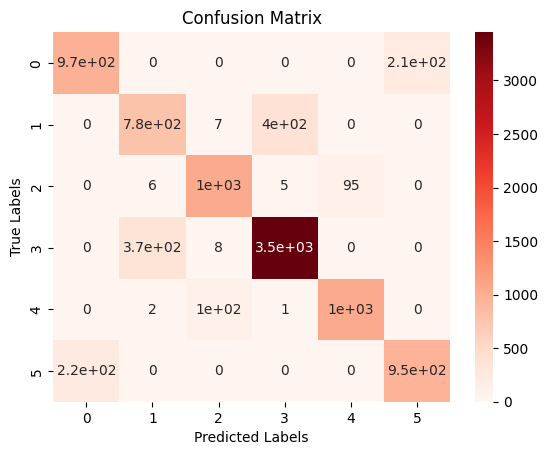

In [55]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**Random Forest Classification**

In [56]:
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)
print(classification_report(y_pred, y_test))
print("Recall Score is: ",recall_score(y_pred, y_test,average="micro"))

              precision    recall  f1-score   support

           0       0.82      0.85      0.83      1137
           1       0.61      0.68      0.64      1060
           2       0.93      0.89      0.91      1204
           3       0.91      0.88      0.90      3946
           4       0.90      0.93      0.92      1107
           5       0.85      0.82      0.84      1219

    accuracy                           0.86      9673
   macro avg       0.84      0.84      0.84      9673
weighted avg       0.86      0.86      0.86      9673

Recall Score is:  0.8569213274061822


Text(0.5, 1.0, 'Confusion Matrix')

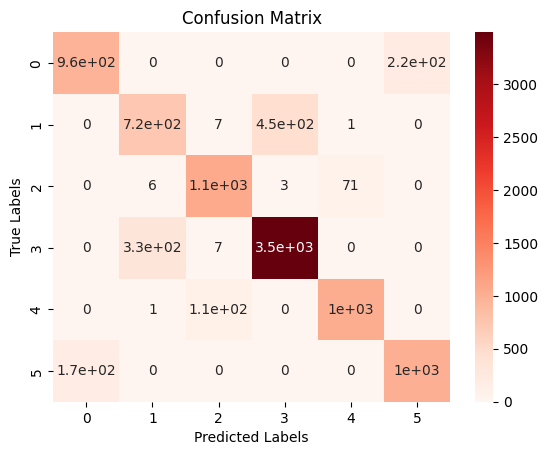

In [57]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**XGB Classification**

In [58]:
xgb=XGBClassifier()
xgb.fit(x_train,y_train)
y_pred = xgb.predict(x_test)
print(classification_report(y_pred, y_test))
print("Recall Score is: ",recall_score(y_pred, y_test,average="micro"))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85      1151
           1       0.65      0.75      0.69      1031
           2       0.95      0.93      0.94      1178
           3       0.93      0.90      0.91      3972
           4       0.94      0.95      0.95      1136
           5       0.87      0.85      0.86      1205

    accuracy                           0.88      9673
   macro avg       0.86      0.87      0.87      9673
weighted avg       0.89      0.88      0.88      9673

Recall Score is:  0.8809056135635274


Text(0.5, 1.0, 'Confusion Matrix')

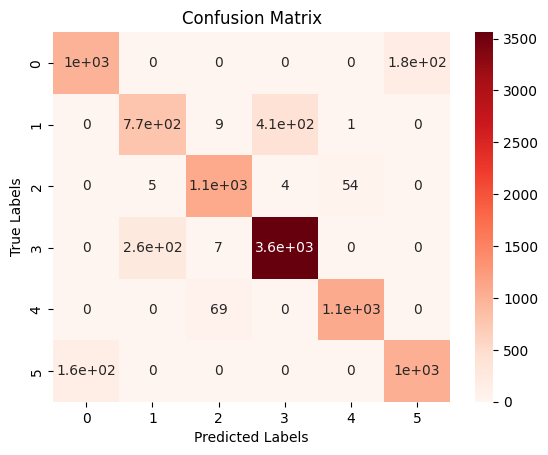

In [59]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

##2. Undersampling

In [100]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)

# Instantiate RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply RandomUnderSampler to the dataset
X_resampled_under, y_resampled_under = rus.fit_resample(X_train, y_train)



# Verify the shape of the resampled data
print("Original shape:", x.shape, y.shape)
print("Resampled shape:", X_resampled_under.shape, y_resampled_under.shape)

Original shape: (38692, 8) (38692,)
Resampled shape: (18474, 8) (18474,)


**Performing the train-test split**

In [61]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X_resampled_under, y_resampled_under, test_size=0.33, random_state=42)

**Target Feature Distribution after UnderSampling**

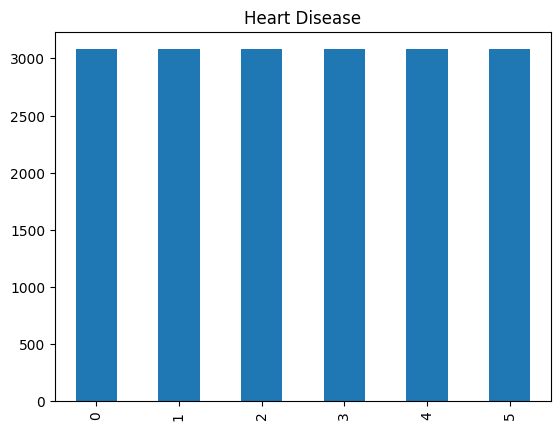

In [62]:
y_resampled_under.value_counts().plot(kind='bar')
plt.title('Heart Disease')
plt.show()

##  Modelling After UnderSampling

**Logistic Regression**

In [67]:
lr=LogisticRegression()
lr.fit(X_train1,y_train1)
y_pred1 = lr.predict(X_test1)
print(classification_report(y_pred1, y_test1))
print("Recall Score is: ",recall_score(y_pred1, y_test1,average="micro"))


              precision    recall  f1-score   support

           0       0.80      0.79      0.80      1016
           1       0.80      0.69      0.74      1183
           2       0.80      0.79      0.79      1036
           3       0.33      0.57      0.42       583
           4       0.82      0.75      0.79      1134
           5       0.74      0.65      0.69      1145

    accuracy                           0.72      6097
   macro avg       0.72      0.71      0.70      6097
weighted avg       0.75      0.72      0.73      6097

Recall Score is:  0.7160898802689848


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix')

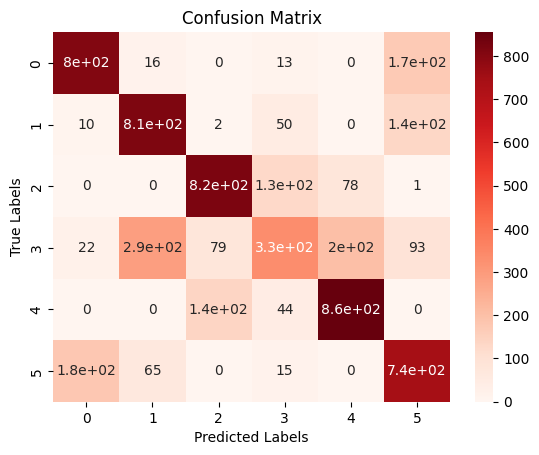

In [68]:
# Compute confusion matrix
cm = confusion_matrix(y_test1, y_pred1)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**Decision Tree Classification**

In [69]:
tre=DecisionTreeClassifier()
tre.fit(X_train1,y_train1)
y_pred1 = tre.predict(X_test1)
print(classification_report(y_pred1, y_test1))
print("Recall Score is: ",recall_score(y_pred1, y_test1,average="micro"))

              precision    recall  f1-score   support

           0       0.78      0.81      0.80       970
           1       0.82      0.79      0.80      1041
           2       0.88      0.90      0.89      1009
           3       0.79      0.82      0.81       986
           4       0.90      0.89      0.90      1053
           5       0.82      0.79      0.80      1038

    accuracy                           0.83      6097
   macro avg       0.83      0.83      0.83      6097
weighted avg       0.83      0.83      0.83      6097

Recall Score is:  0.8333606691815647


Text(0.5, 1.0, 'Confusion Matrix')

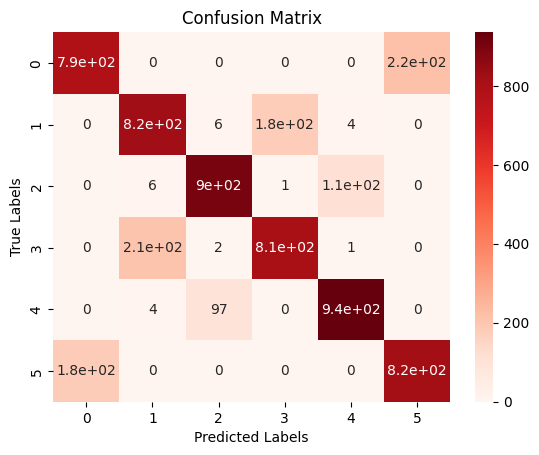

In [70]:
# Compute confusion matrix
cm = confusion_matrix(y_test1, y_pred1)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**Decision Tree with Hyperparameter Tuning**\
Implemented Grid Search Algorithm to retrieve the Best parameters

In [ ]:
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [4, 8],
    'min_samples_split': [2, 4, 8, 16]
}

# Grid search for best hyperparameters
grid_search_dtc = GridSearchCV(tre, param_grid, cv=5, n_jobs=-1)
grid_search_dtc.fit(X_train1, y_train1)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters for Decision Tree: ", grid_search_dtc.best_params_)

Best hyperparameters for Decision Tree:  {'max_depth': 6, 'min_samples_leaf': 8, 'min_samples_split': 2}


Fitted the Model with the Best Parameters Retrieved

In [75]:
tre=DecisionTreeClassifier(max_depth= 6, min_samples_leaf= 8, min_samples_split= 2)
tre.fit(X_train1,y_train1)
y_pred1 = tre.predict(X_test1)
print(classification_report(y_pred1, y_test1))
print("Recall Score is: ",recall_score(y_pred1, y_test1,average="micro"))


              precision    recall  f1-score   support

           0       0.68      0.92      0.78       745
           1       0.98      0.76      0.86      1310
           2       0.86      0.93      0.90       952
           3       0.70      0.99      0.82       715
           4       0.94      0.88      0.91      1112
           5       0.94      0.75      0.83      1263

    accuracy                           0.85      6097
   macro avg       0.85      0.87      0.85      6097
weighted avg       0.88      0.85      0.85      6097

Recall Score is:  0.8527144497293752


Text(0.5, 1.0, 'Confusion Matrix')

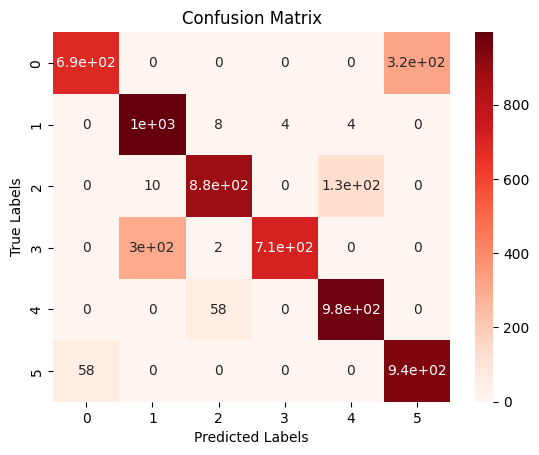

In [76]:
# Compute confusion matrix
cm = confusion_matrix(y_test1, y_pred1)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**Random Forest Classification**

In [101]:
rf=RandomForestClassifier()
rf.fit(X_train1,y_train1)
y_pred1 = rf.predict(X_test1)
print(classification_report(y_pred1, y_test1))
print("Recall Score is: ",recall_score(y_pred1, y_test1,average="micro"))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81       933
           1       0.93      0.79      0.86      1186
           2       0.93      0.91      0.92      1054
           3       0.76      0.93      0.84       833
           4       0.92      0.93      0.92      1016
           5       0.86      0.80      0.82      1075

    accuracy                           0.86      6097
   macro avg       0.86      0.87      0.86      6097
weighted avg       0.87      0.86      0.86      6097

Recall Score is:  0.8638674758077743


Text(0.5, 1.0, 'Confusion Matrix')

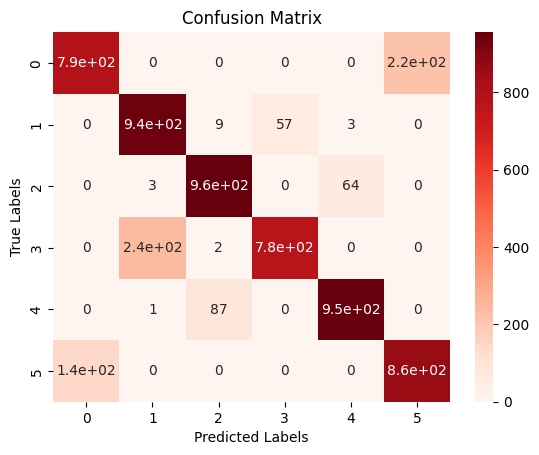

In [102]:
# Compute confusion matrix
cm = confusion_matrix(y_test1, y_pred1)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**Random Forest Classification with Hyperparameter Tuning**\
Implemented Grid Search Algorithm

In [ ]:
#create a Random Forest model
rf_under = RandomForestClassifier(random_state=42)

#define the hyperparameters and their ranges for GridSearchCV
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_depth': [None, 10, 20],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [2, 4],
   'max_features': ['sqrt', 'log2', 0.5]
}

#create a GridSearchCV object with the Random Forest model and hyperparameters
grid_search = GridSearchCV(rf_under, param_grid=param_grid, cv=5)

#fit the GridSearchCV object to the data
grid_search.fit(X_train1, y_train1)

#print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 100}


Fitted the Model with the Best Parameters retrieved

In [ ]:
rf=RandomForestClassifier(max_depth= None, max_features= 0.5, min_samples_leaf= 2, min_samples_split=5, n_estimators= 100)
rf.fit(X_train1,y_train1)

y_pred1 = rf.predict(X_test1)
print(classification_report(y_pred1, y_test1))
print("The Recall Score is : ",recall_score(y_pred1, y_test1,average="micro"))




              precision    recall  f1-score   support

           0       0.81      0.86      0.83       945
           1       0.94      0.79      0.86      1200
           2       0.94      0.91      0.93      1048
           3       0.76      0.94      0.84       819
           4       0.92      0.94      0.93      1022
           5       0.87      0.82      0.84      1063

    accuracy                           0.87      6097
   macro avg       0.87      0.88      0.87      6097
weighted avg       0.88      0.87      0.87      6097

The Recall Score is :  0.8725602755453502


Text(0.5, 1.0, 'Confusion Matrix')

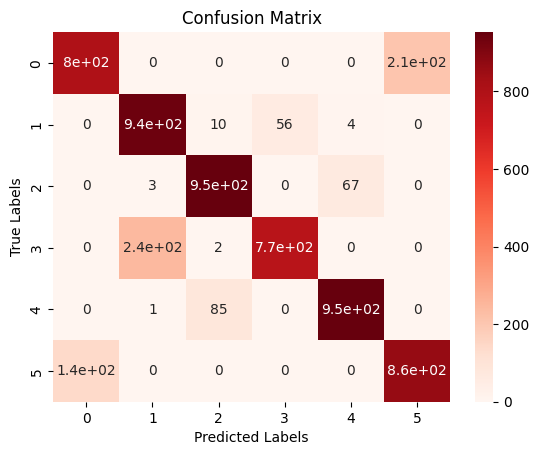

In [78]:
# Compute confusion matrix
cm = confusion_matrix(y_test1, y_pred1)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**XGB Classification**

In [81]:
xgb=XGBClassifier()
xgb.fit(X_train1, y_train1)
y_pred1 = xgb.predict(X_test1)
print(classification_report(y_pred1, y_test1))
print("Recall Score is: ",recall_score(y_pred1, y_test1,average="micro"))

              precision    recall  f1-score   support

           0       0.82      0.87      0.84       950
           1       0.91      0.79      0.85      1158
           2       0.94      0.93      0.93      1029
           3       0.77      0.91      0.83       863
           4       0.94      0.93      0.93      1039
           5       0.87      0.83      0.85      1058

    accuracy                           0.87      6097
   macro avg       0.87      0.88      0.87      6097
weighted avg       0.88      0.87      0.87      6097

Recall Score is:  0.8740364113498442


Text(0.5, 1.0, 'Confusion Matrix')

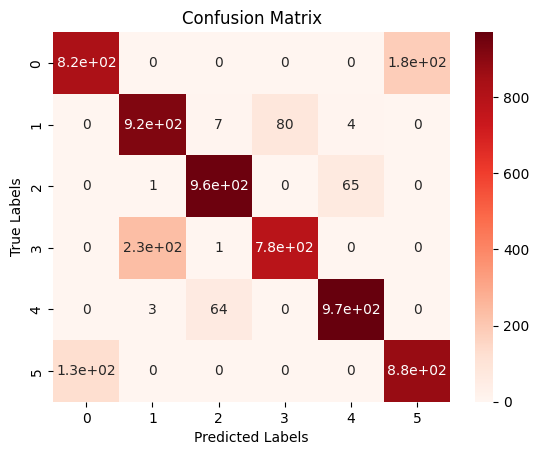

In [82]:
# Compute confusion matrix
cm = confusion_matrix(y_test1, y_pred1)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

##3. SMOTE - Synthetic Minority Over-Sampling Technique

In [84]:
# Apply SMOTE sampling
smote = SMOTE(random_state=42)
X_resampled_smote, y_resampled_smote = smote.fit_resample(x, y)

# Verify the shape of the resampled data
print("Original shape:", x.shape, y.shape)
print("Resampled shape:", X_resampled_smote.shape, y_resampled_smote.shape)


Original shape: (38692, 8) (38692,)
Resampled shape: (92952, 8) (92952,)


**Performing the train-test split**

In [87]:
X_train_over,X_test_over,y_train_over,y_test_over = train_test_split(X_resampled_smote, y_resampled_smote)

**Target Feature Distribution after SMOTE OverSampling**

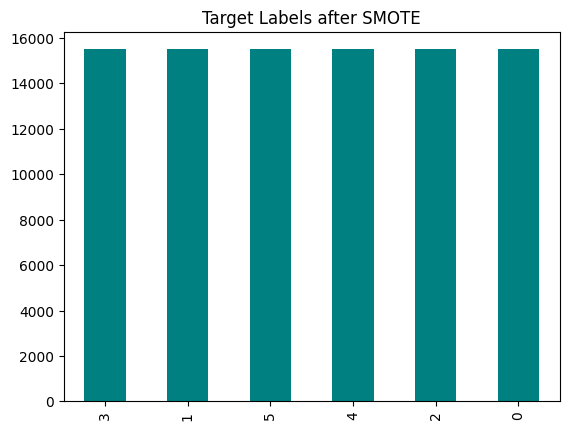

In [103]:
y_resampled_smote.value_counts().plot(kind='bar', color="teal")
plt.title('Target Labels after SMOTE')
plt.show()

## Model Implementation after SMOTE OverSampling

**Logistic Regression**

In [88]:
lr_over=LogisticRegression()
lr_over.fit(X_train_over,y_train_over)
y_pred_over = lr.predict(X_test_over)
print(classification_report(y_pred_over, y_test_over))
print("The Recall Score is: ",recall_score(y_pred_over, y_test_over, average="macro"))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      3999
           1       0.80      0.71      0.76      4417
           2       0.81      0.77      0.79      4020
           3       0.34      0.58      0.43      2238
           4       0.81      0.75      0.78      4174
           5       0.78      0.69      0.74      4390

    accuracy                           0.73     23238
   macro avg       0.73      0.72      0.72     23238
weighted avg       0.76      0.73      0.74     23238

The Recall Score is:  0.7226110527178307


/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Text(0.5, 1.0, 'Confusion Matrix')

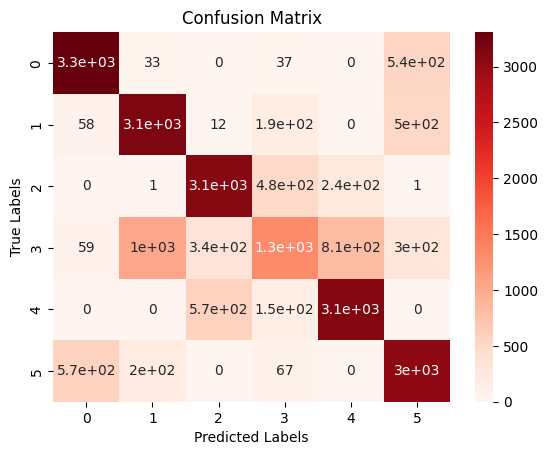

In [89]:
# Compute confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**Decision Tree Classification**

In [105]:
dt_over=DecisionTreeClassifier()
dt_over.fit(X_train_over,y_train_over)
y_pred_over = dt_over.predict(X_test_over)
print(classification_report(y_pred_over, y_test_over))
print("The Recall Score is: ",recall_score(y_pred_over, y_test_over, average="macro"))

              precision    recall  f1-score   support

           0       0.89      0.89      0.89      3934
           1       0.88      0.88      0.88      3914
           2       0.94      0.94      0.94      3807
           3       0.88      0.88      0.88      3863
           4       0.95      0.95      0.95      3849
           5       0.89      0.89      0.89      3871

    accuracy                           0.90     23238
   macro avg       0.90      0.90      0.90     23238
weighted avg       0.90      0.90      0.90     23238

The Recall Score is:  0.9040614508767971


Text(0.5, 1.0, 'Confusion Matrix')

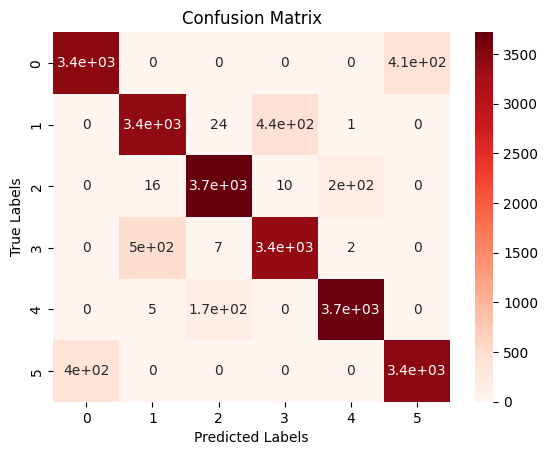

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**Decision Tree Classification with Hyperparameter Tuning**\
Implemted Grid Search Algorithm

In [ ]:
param_grid = {
    'max_depth': [2, 4, 6, 8, 10],
    'min_samples_leaf': [2, 4, 8],
    'min_samples_split': [2, 4, 8, 16]
}

# Grid search for best hyperparameters
grid_search_dtc = GridSearchCV(dt_over, param_grid, cv=3, n_jobs=-1)
grid_search_dtc.fit(X_train_over, y_train_over)

# Print the best hyperparameters and accuracy score
print("Best hyperparameters for Decision Tree: ", grid_search_dtc.best_params_)


Best hyperparameters for Decision Tree:  {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2}


Fitted the Model with the Best Parameters Retrieved

In [90]:
dt_over = DecisionTreeClassifier(max_depth= 10, min_samples_leaf= 2, min_samples_split= 2)
dt_over.fit(X_train_over,y_train_over)
y_pred_over = dt_over.predict(X_test_over)
print(classification_report(y_pred_over, y_test_over))
print("The Recall Score is: ",recall_score(y_pred_over, y_test_over, average="macro"))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3906
           1       0.97      0.79      0.87      4823
           2       0.93      0.91      0.92      3902
           3       0.74      0.97      0.84      2947
           4       0.92      0.94      0.93      3761
           5       0.88      0.88      0.88      3899

    accuracy                           0.89     23238
   macro avg       0.89      0.89      0.89     23238
weighted avg       0.90      0.89      0.89     23238

The Recall Score is:  0.8943016197038078


Text(0.5, 1.0, 'Confusion Matrix')

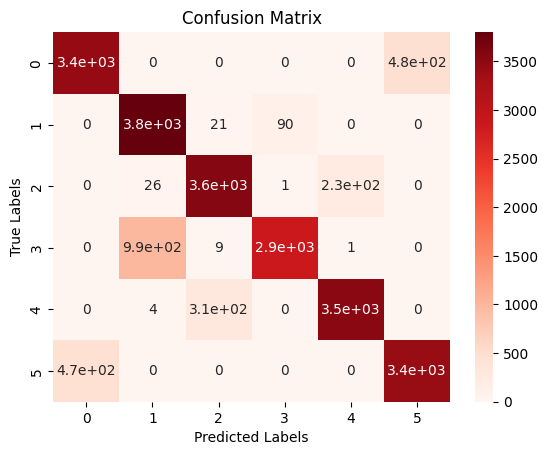

In [91]:
# Compute confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**Random Forest Classification**

In [92]:
rf_over=RandomForestClassifier()
rf_over.fit(X_train_over,y_train_over)
y_pred_over = dt_over.predict(X_test_over)
print(classification_report(y_pred_over, y_test_over))
print("The Recall Score is: ",recall_score(y_pred_over, y_test_over, average="micro"))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88      3906
           1       0.97      0.79      0.87      4823
           2       0.93      0.91      0.92      3902
           3       0.74      0.97      0.84      2947
           4       0.92      0.94      0.93      3761
           5       0.88      0.88      0.88      3899

    accuracy                           0.89     23238
   macro avg       0.89      0.89      0.89     23238
weighted avg       0.90      0.89      0.89     23238

The Recall Score is:  0.8867372407263964


Text(0.5, 1.0, 'Confusion Matrix')

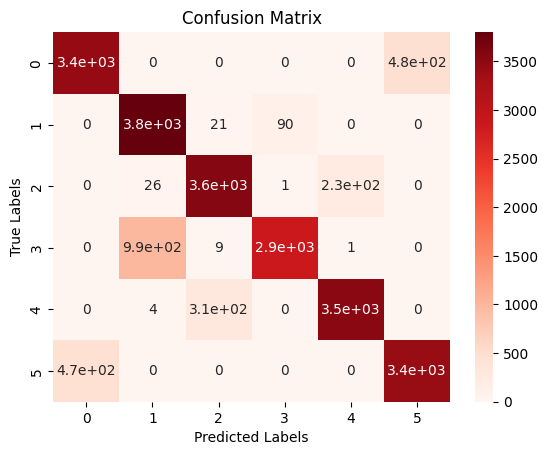

In [93]:
# Compute confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**Random Forest Classification with HyperParameter Tuning**\
Implemented Grid Search Algorithm

In [ ]:
#create a Random Forest model
rf = RandomForestClassifier(random_state=42)

#define the hyperparameters and their ranges for GridSearchCV
param_grid = {
   'n_estimators': [100, 200, 500],
   'max_depth': [None, 10, 20],
   'min_samples_split': [2, 5, 10],
   'min_samples_leaf': [2, 4],
   'max_features': ['sqrt', 'log2', 0.5]
}

#create a GridSearchCV object with the Random Forest model and hyperparameters
grid_search = GridSearchCV(rf_over, param_grid=param_grid, cv=5)

#fit the GridSearchCV object to the data
grid_search.fit(X_train_over, y_train_over)

#print the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
#print("Best score: ", grid_search.best_score_)


Best hyperparameters:  {'max_depth': None, 'max_features': 0.5, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 500}


Fitted the Model with the Best Parameters Retrieved

In [94]:
rf_over=RandomForestClassifier(max_depth= None, max_features= 0.5, min_samples_leaf= 2, min_samples_split=2, n_estimators= 500)
rf_over.fit(X_train_over,y_train_over)
y_pred_over = rf_over.predict(X_test_over)
print(classification_report(y_pred_over, y_test_over))
print("The Recall Score: ",recall_score(y_pred_over, y_test_over, average='micro'))

              precision    recall  f1-score   support

           0       0.91      0.93      0.92      3847
           1       0.95      0.86      0.90      4354
           2       0.96      0.95      0.96      3833
           3       0.84      0.95      0.89      3413
           4       0.96      0.96      0.96      3833
           5       0.93      0.91      0.92      3958

    accuracy                           0.92     23238
   macro avg       0.92      0.93      0.92     23238
weighted avg       0.93      0.92      0.92     23238

The Recall Score:  0.9247783802392633


Text(0.5, 1.0, 'Confusion Matrix')

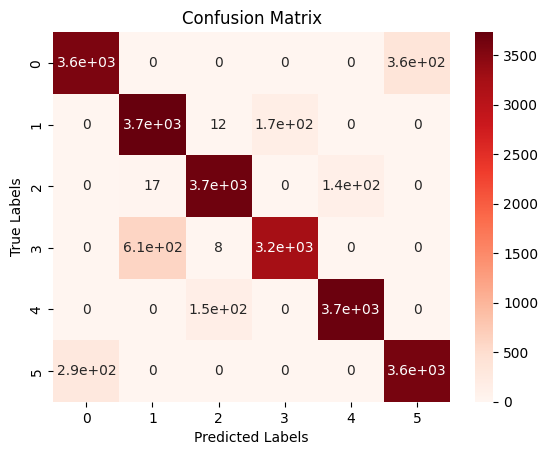

In [95]:
# Compute confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

**XGB Classification**

In [98]:
xgb=XGBClassifier()
xgb.fit(X_train_over, y_train_over)
y_pred_over = xgb.predict(X_test_over)
print(classification_report(y_pred_over, y_test_over))
print("Recall Score is: ",recall_score(y_pred_over, y_test_over,average="macro"))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3821
           1       0.94      0.88      0.91      4172
           2       0.96      0.95      0.95      3838
           3       0.87      0.93      0.90      3592
           4       0.96      0.96      0.96      3831
           5       0.92      0.90      0.91      3984

    accuracy                           0.92     23238
   macro avg       0.92      0.93      0.92     23238
weighted avg       0.93      0.92      0.92     23238

Recall Score is:  0.9253177941104802


Text(0.5, 1.0, 'Confusion Matrix')

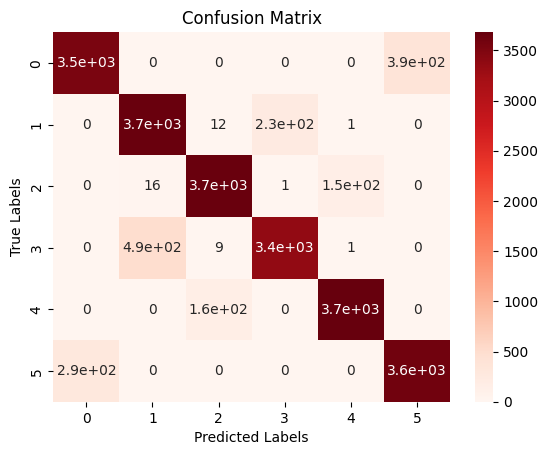

In [99]:
# Compute confusion matrix
cm = confusion_matrix(y_test_over, y_pred_over)


# Create confusion matrix plot
sns.heatmap(cm, annot=True, cmap='Reds')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

##Conclusion

We computed the Recall score for all models and selected the one that minimizes False Negatives and ensures the safety of patients.This step is critical in avoiding misclassification of patients and ensuring accurate diagnosis and treatment. \
\
Recall = TP/(TP+FN)\
*TP = True Positive\
FN = False Negatives*

\

By looking at the Results, **XGB Classification Algorithm** performed the best after **SMOTE Sampling Technique**, giving a **Recall Score** of **92.53%**